In [1]:
# Read in text data 
import nltk
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200) # set max number of characters can see in pd dataframe
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

#path location to the directory
path = 'data/aclimdb'

# Load the dataset
train_texts = []
train_labels = []
test_texts = []
test_labels = []

for dataset in ['train', 'test']:
    for category in ['pos', 'neg']:
        dataset_path = os.path.join(path, dataset, category)
        for fname in os.listdir(dataset_path):
            if fname.endswith('.txt'):
                with open(os.path.join(dataset_path, fname)) as f:
                    
                    if dataset == 'train': train_texts.append(f.read())
                    else: test_texts.append(f.read())
                
                label = 0 if category == 'neg' else 1
                if dataset == 'train': 
                    train_labels.append(label)
                else: 
                    test_labels.append(label)

# Converting to np.array
train_texts = np.array(train_texts)
train_labels = np.array(train_labels)
test_texts = np.array(test_texts)
test_labels = np.array(test_labels)

print ('Train samples shape :', train_texts.shape)
print ('Train labels shape  :', train_labels.shape)
print ('Test samples shape  :', test_texts.shape)
print ('Test labels shape   :', test_labels.shape)

Train samples shape : (25000,)
Train labels shape  : (25000,)
Test samples shape  : (25000,)
Test labels shape   : (25000,)


In [2]:
full_corpus = pd.DataFrame({
    'label': train_labels,
    'body': train_texts
})

data = full_corpus.sample(frac=1).reset_index(drop=True)
data = data[:5000]
data.head(10)

,label,body
0,0,"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life ch..."
1,1,"I enjoyed this movie as a kid when it came out, and to this day still do. A simple story involving the search for a kidnapped girl and an adventurer literally straight out of paperback lore. It ha..."
2,1,"In a time when Hollywood is making money by showing our weaknesses, despair, crime, drugs, and war, along comes this film which reminds us the concept of the ""Indomitable Spirit"". If you are feeli..."
3,1,"""Perhaps we can arrange a meet. "" ""Where are you now? "" ""I'm sitting in my office. "" ""I doubt that. "" ""Why would you doubt that? "" ""If you were in your office right now we'd be having this convers..."
4,0,"Space Camp, which had the unfortunate luck to be planned around the time of the Challenger accident, deserves such luck. The ""stars"" make a mockery of acting, Lea Thomson actually being turned sid..."
5,1,"Having first watched the movie at 14, I remember being struck by hearing the word 'govno' (sh*t) for the first time ever on the then-still-Soviet TV (I bet it really was *the* first time in histor..."
6,0,"""Unhinged"" is one strange little film, a forgotten slasher from the golden age of the genre. It's hard to really write a satisfying review of this film simply because of the fact that the film is ..."
7,1,"The 4th Pokemon movie made me cry when Celebi died. Don't you dare say that Pokemon sucks! I don't like it when people say that.... I've liked Pokemon for 5 or 6 years, so everyone should enjoy Po..."
8,1,"This is a movie that gets better each time I see it. There are so many nuanced performances in this. William Tracey, as Pepi, is a delight, bringing sharp comic relief. Joseph Schildkraut as Vadas..."
9,0,Gene Hackman gets himself busted out of prison by a nameless government agency who want him for an assassination. It's a given of course that Hackman has the proficient skills for the job.<br /><b...


In [3]:
# Exploring dataset
# What is the shape of this datataset

print("Input data has {} rows and {} columns".format(len(data), len(data.columns)))

Input data has 5000 rows and 2 columns


In [4]:
# How many revies are negative and positive?

print("Out of {} rows, {} are negative, {} are positive".format(len(data), 
                                                       len(data[data['label']==0]), 
                                                       len(data[data['label']==1])))

Out of 5000 rows, 2502 are negative, 2498 are positive


In [5]:
# Is there any missing data?
print("Number of null in label: {}".format(data['label'].isnull().sum()))
print("Number of null in text: {}".format(data['body'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


In [6]:
# Data Pre-processing
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['body'], data['label'], test_size=0.2)

In [8]:
# Vectorizing data
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train)

tfidf_train = tfidf_vect_fit.transform(X_train)
tfidf_test = tfidf_vect_fit.transform(X_test)

In [9]:
X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

In [14]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import LSTM

input_dim = X_train_vect.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

W0715 18:11:36.957902 140735564440448 deprecation.py:506] From /Users/alex/Desktop/NLP/sentiment_analysis_movie_review/venv/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0715 18:11:36.999993 140735564440448 deprecation.py:323] From /Users/alex/Desktop/NLP/sentiment_analysis_movie_review/venv/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                331400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 331,411
Trainable params: 331,411
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train_vect, y_train,
                     epochs=100,
                     verbose=False,
                     validation_data=(X_test_vect, y_test))

In [16]:
loss, accuracy = model.evaluate(X_train_vect, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_vect, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8610


In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

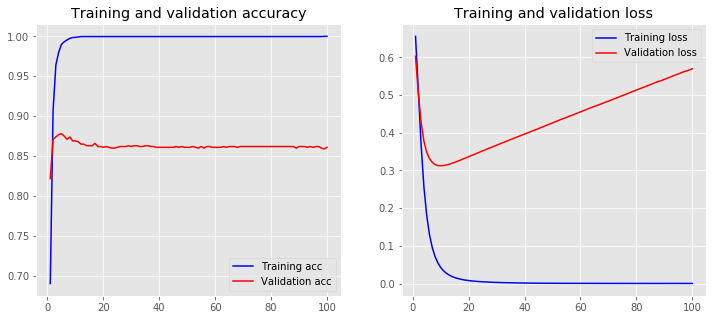

In [18]:
plot_history(history)